<a href="https://colab.research.google.com/github/sahug/ds-tensorflow-colab/blob/master/Tensorflow%20-%20Breast%20Cancer%20Detection%20Using%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tensorflow - Breast Cancer Detection Using CNN**

**Import Libraries**

In [36]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Load Dataset**

In [41]:
cancer = datasets.load_breast_cancer()

**Data Descr**

In [7]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

**Dataframe**

In [42]:
x = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [10]:
cancer.target_names #0 is malignant and 1 is benign

array(['malignant', 'benign'], dtype='<U9')

**Split Dataset**

We will split the datset in the pipeline. Check the pipeline, classifier for pipeline, below.

In [78]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

**Normalize Dataset**

In [79]:
def normalizeDataset(ds):
    normalizer = tf.keras.layers.Normalization()    
    normalizer.adapt(ds)    
    return normalizer(ds)

x_train_n = normalizeDataset(x)    
x_train_n.shape

<tf.Tensor: shape=(569, 30), dtype=float32, numpy=
array([[ 1.0970638 , -2.073334  ,  1.2699338 , ...,  2.2960763 ,
         2.7506218 ,  1.9370152 ],
       [ 1.8298204 , -0.35363132,  1.6859545 , ...,  1.0870845 ,
        -0.24388953,  0.2811903 ],
       [ 1.5798881 ,  0.45618796,  1.5665032 , ...,  1.9550005 ,
         1.1522547 ,  0.20139174],
       ...,
       [ 0.70228416,  2.045575  ,  0.6726759 , ...,  0.41406885,
        -1.1045488 , -0.31840897],
       [ 1.838341  ,  2.3364582 ,  1.9825244 , ...,  2.2899854 ,
         1.9190826 ,  2.2196357 ],
       [-1.8084016 ,  1.2217933 , -1.8143885 , ..., -1.7450628 ,
        -0.0481384 , -0.75120634]], dtype=float32)>

**Model**

In [80]:
input_shape = x_train.shape[1], 1
input_shape

(30, 1)

In [81]:
from keras import activations
from keras.backend import int_shape

def buildModel():

    inputs = keras.Input(shape=(input_shape))

    x = keras.layers.Conv1D(filters=32, kernel_size=2, activation=activations.relu)(inputs)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.2)(x)

    x = keras.layers.Conv1D(filters=64, kernel_size=2, activation=activations.relu)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.layers.Dropout(0.5)(x)

    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(64, activation=activations.relu)(x)
    x = keras.layers.Dropout(0.5)(x)

    outputs = keras.layers.Dense(1,  activation=activations.sigmoid)(x)
    
    model = keras.Model(inputs=inputs, outputs=[outputs], name="conv1d")

    # Compile 
    loss = keras.losses.BinaryCrossentropy()
    optim = keras.optimizers.Adam(learning_rate=0.00005)
    metrics = [keras.metrics.SparseCategoricalAccuracy()]

    model.compile(loss=loss, optimizer=optim, metrics=metrics)

    return model

**Classifier for Pipeline**

In [82]:
from scikeras.wrappers import KerasClassifier

kwargs = dict(
    model=buildModel(),
    epochs=10,
    batch_size = 128,
    verbose=1,
    random_state=0,
)
# Here we are splitting the dataset to train and test as well.
clf = KerasClassifier(model=buildModel(), epochs=5, validation_split=0.2, batch_size=8, verbose = 1)

**Pipeline**

The class below is used to create a pipeline using your custom methods. Here we are using Normalization layer in the pipeline.

In [83]:
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [84]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")
pipeline = Pipeline(steps=[
                ("Normalization", DataframeFunctionTransformer(normalizeDataset)),
                ("model", clf)
])
pipeline

Pipeline(steps=[('Normalization',
                 <__main__.DataframeFunctionTransformer object at 0x000001A4194DBEB0>),
                ('model',
                 KerasClassifier(epochs=5, model=<keras.engine.functional.Functional object at 0x000001A4194336A0>))])

**Train**

In [85]:
pipeline.fit(x, y)

Epoch 1/5
15/15 [==============================] - 1s 4ms/step - loss: 1.0720 - sparse_categorical_accuracy: 0.3736
Epoch 2/5
15/15 [==============================] - 0s 7ms/step - loss: 0.6676 - sparse_categorical_accuracy: 0.3736
Epoch 3/5
15/15 [==============================] - 0s 5ms/step - loss: 0.5314 - sparse_categorical_accuracy: 0.3736
Epoch 4/5
15/15 [==============================] - 0s 6ms/step - loss: 0.3538 - sparse_categorical_accuracy: 0.3736
Epoch 5/5
15/15 [==============================] - 0s 4ms/step - loss: 0.3940 - sparse_categorical_accuracy: 0.3736


Pipeline(steps=[('Normalization',
                 <__main__.DataframeFunctionTransformer object at 0x000001A4194DBEB0>),
                ('model',
                 KerasClassifier(epochs=5, model=<keras.engine.functional.Functional object at 0x000001A4194336A0>))])

**Plot History**

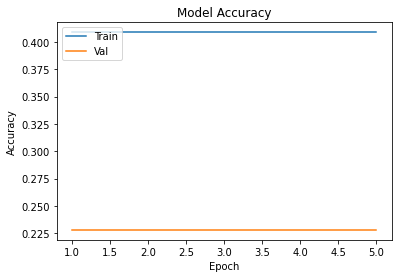

In [52]:
clf.history_.keys()

epoch_range = range(1, 6)

# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, clf.history_["sparse_categorical_accuracy"])
plt.plot(epoch_range, clf.history_["val_sparse_categorical_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

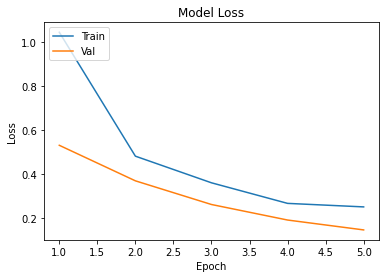

In [53]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, clf.history_["loss"])
plt.plot(epoch_range, clf.history_["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

**Approach 2**

In [86]:
cancer = datasets.load_breast_cancer()

x = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)

y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

# Converting Pandas to Numpy data to reshape the data later.
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

x_train

array([[ 0.26670379,  0.64119581,  0.21021862, ...,  0.57195757,
        -0.36743271, -0.29487344],
       [-1.50538429, -0.78076949, -1.4608281 , ..., -0.14909852,
         0.04677597,  1.00205472],
       [ 1.50388483,  2.19180417,  1.67631803, ...,  1.18936185,
        -0.13144928,  0.93430053],
       ...,
       [-0.30323355,  0.01865526, -0.38082036, ..., -1.55951427,
        -0.75688789, -1.18922878],
       [-0.07525861, -0.69347598, -0.14238757, ..., -0.89178629,
        -0.88395589, -0.72398332],
       [-0.63963558, -0.12147379, -0.56963008, ...,  0.59599277,
         3.07495497,  3.17583505]])

In [56]:
# Build Model
epochs = 5
model = Sequential()

model.add(Conv1D(filters=32, kernel_size=2, activation="relu", input_shape=(30, 1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(64, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid")) # Only 1 output 0 or 1. sigmoid detects binary i.e. 0 or 1

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Fit the model
history = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test), verbose=1)

Epoch 1/5
15/15 [==============================] - 1s 16ms/step - loss: 0.3846 - accuracy: 0.8352 - val_loss: 0.3732 - val_accuracy: 0.9474
Epoch 2/5
15/15 [==============================] - 0s 6ms/step - loss: 0.1653 - accuracy: 0.9473 - val_loss: 0.3008 - val_accuracy: 0.9474
Epoch 3/5
15/15 [==============================] - 0s 7ms/step - loss: 0.0952 - accuracy: 0.9648 - val_loss: 0.2920 - val_accuracy: 0.8947
Epoch 4/5
15/15 [==============================] - 0s 6ms/step - loss: 0.0890 - accuracy: 0.9736 - val_loss: 0.2884 - val_accuracy: 0.8947
Epoch 5/5
15/15 [==============================] - 0s 6ms/step - loss: 0.0940 - accuracy: 0.9582 - val_loss: 0.2677 - val_accuracy: 0.8947


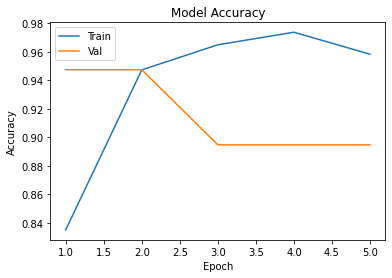

In [67]:
epoch_range = range(1, epochs+1)

# Plot training and validation accuracy values
# sparse_categorical_accuracy vs val_sparse_categorical_accuracy
plt.plot(epoch_range, history.history["accuracy"])
plt.plot(epoch_range, history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

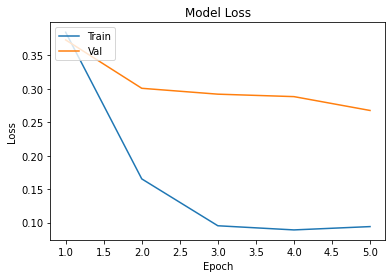

In [68]:
# Plot training and validation loss values
# Loss vs Val_Loss
plt.plot(epoch_range, history.history["loss"])
plt.plot(epoch_range, history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()